In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [23]:
data = pd.read_csv('Data-PR-As2/Genes/data.csv')
labels = pd.read_csv('Data-PR-As2/Genes/labels.csv')

labels = labels.drop(labels='Unnamed: 0', axis=1)
data = data.drop(labels='Unnamed: 0', axis=1)

labels

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=12)



In [22]:
print(labels.shape)

(801, 1)


In [24]:
mutual_info = mutual_info_classif(X_train, y_train.values.ravel())
mutual_info

array([0.        , 0.04002046, 0.1510905 , ..., 0.12282862, 0.14277466,
       0.04503796])

In [37]:
with open('mutual_info_genes.pkl', 'wb') as file: 
    pickle.dump(mutual_info, file) 

In [25]:
mutual_info.shape


(20531,)

In [26]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

gene_7964     0.962294
gene_18381    0.912882
gene_17109    0.887409
gene_7992     0.834676
gene_5407     0.824185
                ...   
gene_12366    0.000000
gene_12367    0.000000
gene_12368    0.000000
gene_12372    0.000000
gene_0        0.000000
Length: 20531, dtype: float64

In [34]:
mutual_info.astype(bool).sum(axis=0)
mutual_info[mutual_info>0.2].count()

7826

<Axes: >

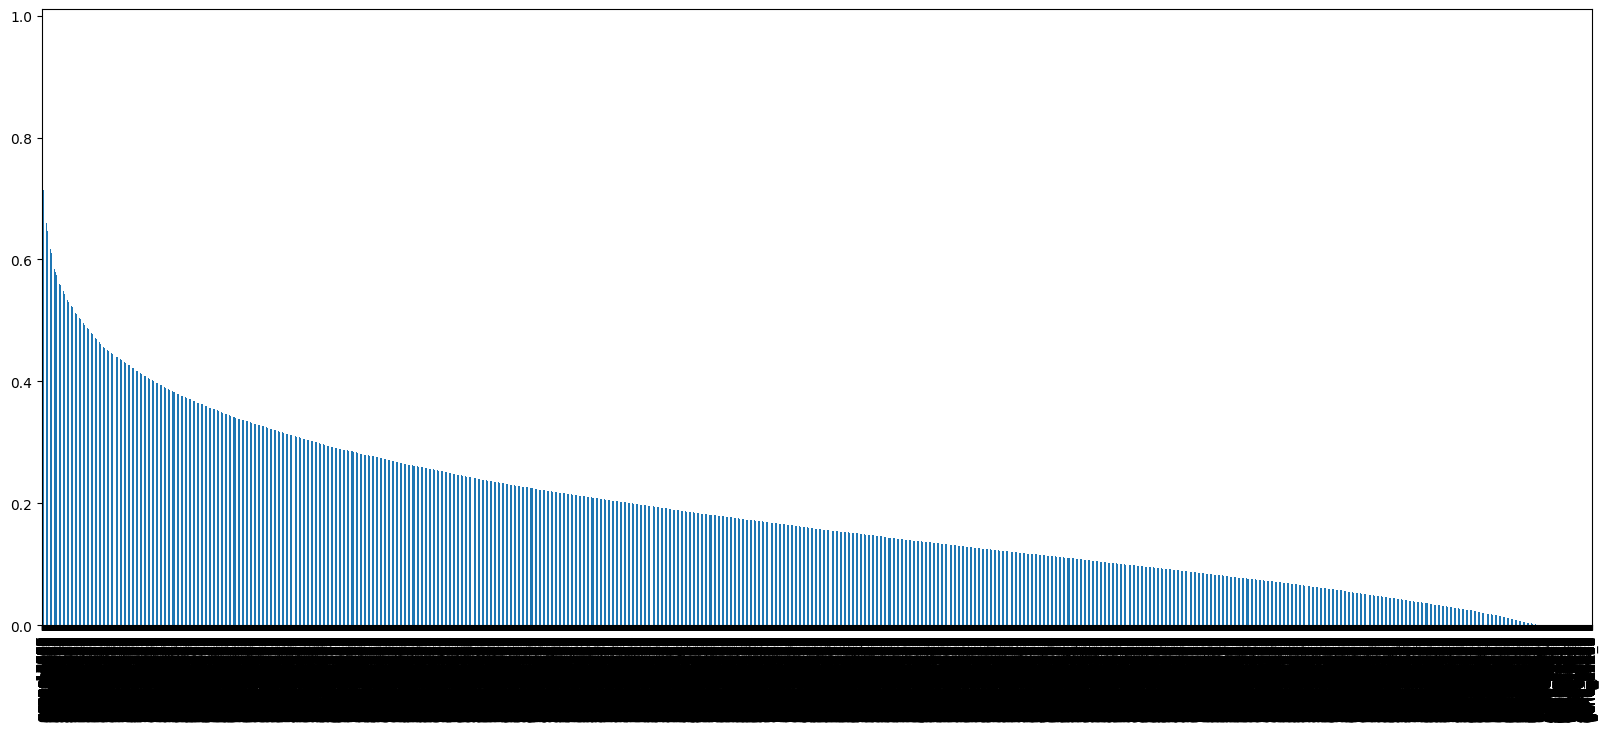

In [38]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]